# Pima Indian Diabetes Analysis



## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Importing the necessary libraries

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # numpy library is used to perform calculations in arrays and work with numbers
import pandas as pd # pandas library is used to interprete and manipulate data

import seaborn as sns # seaborn library is used for plotting graphs for statistical analysis 
import matplotlib.pyplot as plt # matplotlib library is used for plotting and creating visual graphs
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend

# Reading the given dataset

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
pima=pd.read_csv('diabetes.csv')

In [6]:
pima.rename(columns={'Outcome':'Diabetes'}, inplace=True)

In [ ]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As is shown above, the data has 9 columns (numbered from 0 to 8), and 768 rows (numbered from 0 to 767). So this table is (768,9).
It can be inferred from the above that none of the columns of data have empty cells and also, all columns are integer except BMI and DiabetesPedigreeFunction which are float data.

In [ ]:
pima.size

6912

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As explained earlier, all columns of the dataset are in the type of integer, except BMI and DiabetesPedigreeFunction which have a type of float.

## Checking missing values

In [ ]:
pima.isnull().values.any()

False

In [ ]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observations:** It can be seen that the average amount of Glucose in all patients is 121 with a standard deviation of 30. Also, the lowest and highest amount of Glucose in the patients were 44 and 199, respectively. Also, it can be seen that 1/4 of the patients had Glucose levels from 44 to 99. Similar conclusions can be made for 1/2 and 3/4 quartiles.

The maximum number of pregnancies is 17, which could be an outlier for this variable. Also, the minimum and maximum values for Insulin variable is 14 and 846, which shows a large variation and potentially, an outlier (846).

## Plotting the distribution plot for the variable 'BloodPressure'

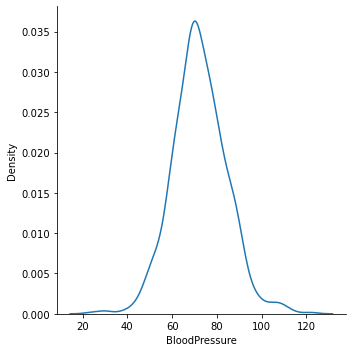

In [ ]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

**Observations:** The above graph shows that "Blood Pressure" is normally distributed (i.e. normal distribution). It can be observed that blood pressures in the range of 60 to 80 have the highest frequency of patients, and as the blood pressures dropped from 60 or increased from 80, the density of patients in this range decreased.

## Determining number of women whose 'Glucose' levels are above the mean level of 'Glucose'

In [ ]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

Out of 768 patients, 343 of them have a glucose level above the average value.

## Creating a pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'.

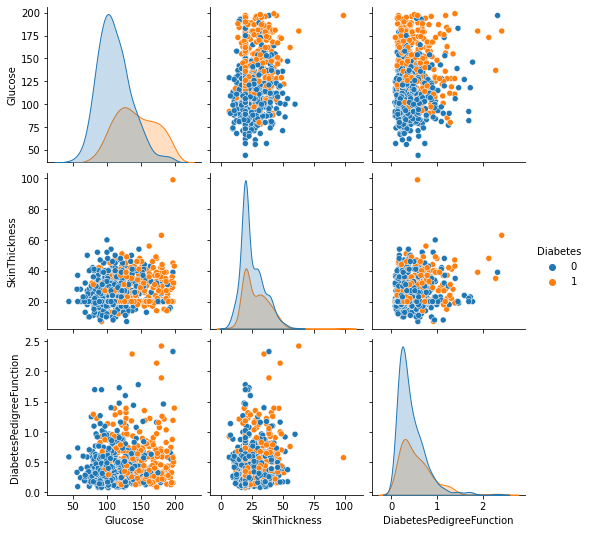

In [ ]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Diabetes')
plt.show()

**Observations:** It can be observed that Glucose does not have a corrolation with skin thickness and diabetes pedigree function, but patients with who have diabetes have higher glucose levels (orange dots versus blue dots). However, it appears that skin thickness and diabetes pedigree functions may have slight corrolation (not strong corrolation). 
The diagonal diagrams show a distribution of the variables. For glucose, it can be seen that both diabetes and non-diabetes patients have normal distributions but are skewed towards right. For skin thickness, the population does not seem to be normally distributed, but for a given skin thickness, the frequency of non-diabetes is more than diabetes. Similarly, for a diven diabetes pedgree function value, the frequency of non-diabetes patients is higher than diabetes.

## Plotting boxplot for the 'Age' variable

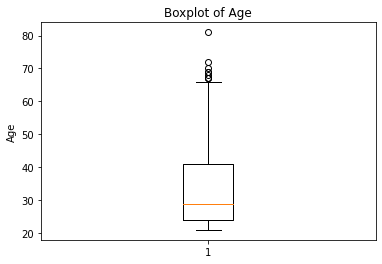

In [ ]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

**Observations:** The above box plot shows that there are many outliers in the upper range. Since outliers are defined as points that are above 1.5*IQR, then we can see that the Age column has a number of outliers in the higher values of the column.

## Plotting boxplot for the 'BMI' variable

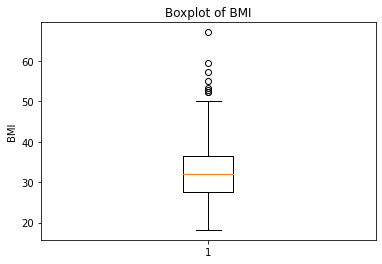

In [ ]:
plt.boxplot(pima['BMI'])

plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

**Observations:** Similar to the boxplot for age, the boxplot for BMI shows many outliers in the upper range as well. 

### **Bivariate and Multivariate analysis**

In [8]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


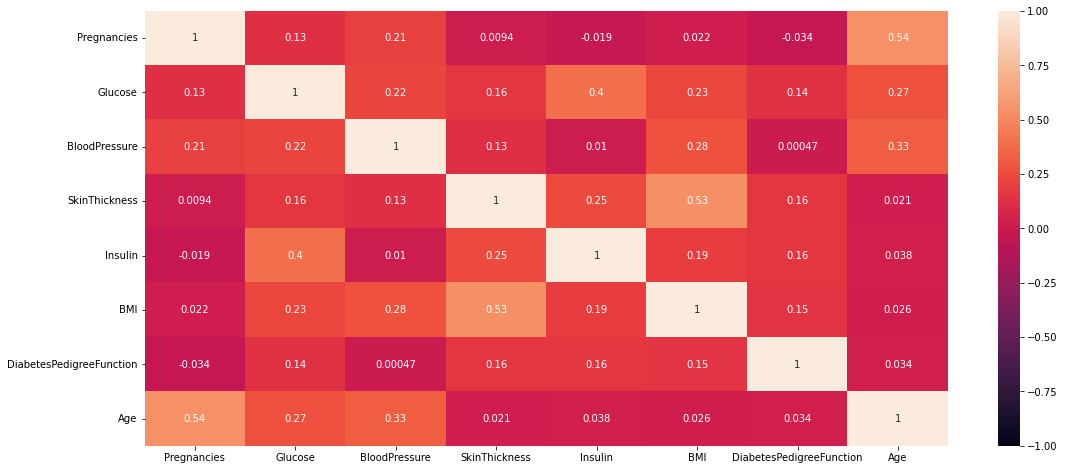

In [10]:
plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1)

# display the plot
plt.show()

**Observations:**
In the heat map above, it can be observed that most boxes are in the middle range (close to 0), meaning that there are no corrolation. Except for Age and pregnancy, which show a slight positive corrolation, and also BMI and skin thickness show a slight positive corrolation.

### **Diabetes and Pregnancy analysis**

Text(0, 0.5, 'Diabetes percentage %')

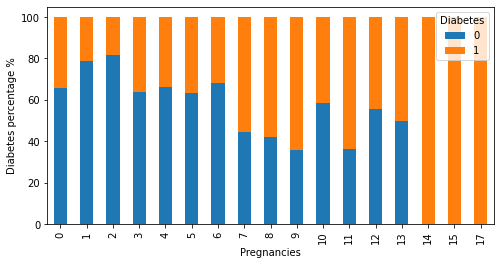

In [ ]:
(pd.crosstab(pima['Pregnancies'],pima['Diabetes'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Diabetes percentage %')

**Observations:**
From the above plot, it appears that those women who were pregnant 14 times or more all had diabetes. Also, it can be seen that as the number of pregnancies increase, the trend of diabetes also increases. Let's check the diabetes status of those women who were pregnant 14 times or more:

In [ ]:
pima[pima['Pregnancies']>13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,79,33.6,0.212,38,1


### **Finding the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
Q1 = pima.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = pima.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (pima.select_dtypes(include=["float64", "int64"]) < lower)
    | (pima.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(pima) * 100

Pregnancies                  0.520833
Glucose                      0.000000
BloodPressure                1.822917
SkinThickness                1.171875
Insulin                     11.588542
BMI                          1.041667
DiabetesPedigreeFunction     3.776042
Age                          1.171875
Diabetes                     0.000000
dtype: float64

**Observations:**
* It can be observed that 11.5 percent of variables in Insulin variable are outliers. In this case, the outliers are not removed  since there will be outliers in real case scenario and it is preferred that our model learns the underlying pattern for such patients.

**Separating the independent variables (X) and the dependent variable (Y)**

In [11]:
X = pima.drop(['Diabetes'], axis=1)
y = pima["Diabetes"]

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [12]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
------------------------------
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


**Observations:**
* All missing values have been treated.

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Predicting a patient will have diabetes and the patient will not be diagnosed with diabetes.
2. Predicting a patient will not have diabetes and the patient will have diabetes.

**Which case is more important?**
* Predicting that a patient will not have diabetes but he/she has diabetes. 

**How to reduce this loss i.e the need to reduce False Negatives?**
* **Here we would want `Recall` to be maximized**, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives (i.e. Class 1) so that the we can identify patients who are at risk of diabetes.

### Model 1

In [13]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [14]:
# Initializing the ANN
model = Sequential()

model.add(Dense(activation = 'relu', input_dim = 8, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer

model.add(Dense(1, activation = 'sigmoid')) 

In [15]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [16]:
  history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 7.5883 - accuracy: 0.5758 - val_loss: 0.7737 - val_accuracy: 0.6111
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6503 - val_loss: 0.6128 - val_accuracy: 0.6852
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6643 - val_loss: 0.5964 - val_accuracy: 0.7130
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7063 - val_loss: 0.6039 - val_accuracy: 0.6759
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.6783 - val_loss: 0.5966 - val_accuracy: 0.7130
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6830 - val_loss: 0.5882 - val_accuracy: 0.6852
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7040 - val_loss: 0.6434 - val_accuracy: 0.6389
Epoch 8/50
14/14 [=

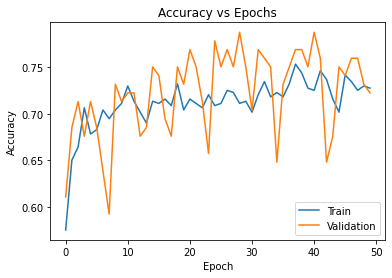

In [17]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


There is noise in the loss behavior here. Sometimes, the loss function fluctuates a lot during training, which makes the convergence slow. These fluctuations are due to the nature of Stochastic Gradient Descent that produces noisy updates in the parameters. 

Let's check the other metrices. Here, we will look at predictions of the test dataset with a threshold of higher than 0.5.

In [18]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [19]:
#This function will make a plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):



    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

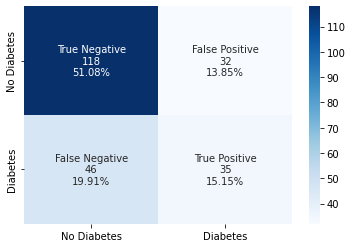

In [20]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'No Diabetes','Diabetes']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the false negatives are about 20%. We would like to reduce this number as per our objective.

In [24]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       150
           1       0.52      0.43      0.47        81

    accuracy                           0.66       231
   macro avg       0.62      0.61      0.61       231
weighted avg       0.65      0.66      0.65       231



The recall percentage is 0.43. I will now try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [28]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [29]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim =8))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [31]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
7/7 [==============================] - 1s 68ms/step - loss: 11.8742 - accuracy: 0.5758 - val_loss: 13.4021 - val_accuracy: 0.4074
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 8.2702 - accuracy: 0.5711 - val_loss: 4.1411 - val_accuracy: 0.6296
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 6.3435 - accuracy: 0.5874 - val_loss: 4.3253 - val_accuracy: 0.6574
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 3.7196 - accuracy: 0.5874 - val_loss: 5.8892 - val_accuracy: 0.6389
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 4.2379 - accuracy: 0.5781 - val_loss: 2.8357 - val_accuracy: 0.6204
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 2.6526 - accuracy: 0.6620 - val_loss: 0.8969 - val_accuracy: 0.7778
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5113 - accuracy: 0.6410 - val_loss: 0.8844 - val_accuracy: 0.7593
Epoch 8/50
7/7 [==============

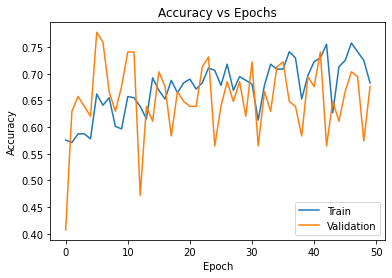

In [32]:
# Plotting accuracy at different epochs
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

As shown above, the accuracy of both training set and validation set has been reduced in the second model, to about 0.68.

**Let's tune the threshold using ROC-AUC**


The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

Best Threshold=0.144453, G-Mean=0.638


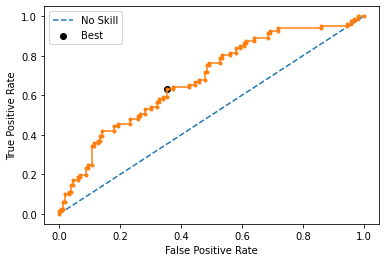

In [33]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [34]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

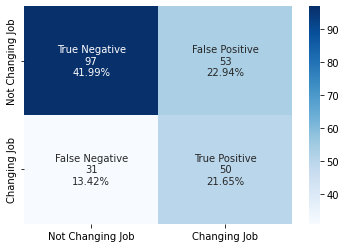

In [37]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels =['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [38]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       150
           1       0.49      0.62      0.54        81

    accuracy                           0.64       231
   macro avg       0.62      0.63      0.62       231
weighted avg       0.66      0.64      0.64       231



As is shown above, in the second model, False Negatives have been reduced to about 13% (from 20%) and recalls have increased to 0.62.

In the next model, I will try to use the Batch Normalization technique and check to see if any of the scores can be improved.

### Model 3

In [39]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [40]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = 8))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [41]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [42]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [43]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.6978 - accuracy: 0.5758 - val_loss: 2.3901 - val_accuracy: 0.3981
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.7483 - val_loss: 2.6537 - val_accuracy: 0.3981
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7599 - val_loss: 2.3901 - val_accuracy: 0.3981
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.7786 - val_loss: 2.2309 - val_accuracy: 0.3981
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.7902 - val_loss: 2.1310 - val_accuracy: 0.3981
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8112 - val_loss: 2.0293 - val_accuracy: 0.3981
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8019 - val_loss: 1.8534 - val_accuracy: 0.3981
Epoch 8/50
7/7 [=================

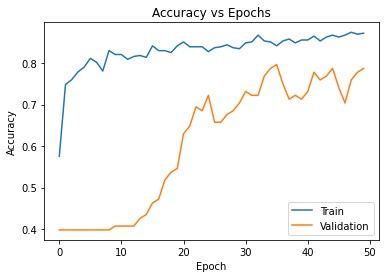

In [44]:
# Plotting accuracy at different epochs
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

From the above plot, it appears that the model is overfitting since the validation accuracy is not closely following the training accuracy.

Best Threshold=0.450590, G-Mean=0.724


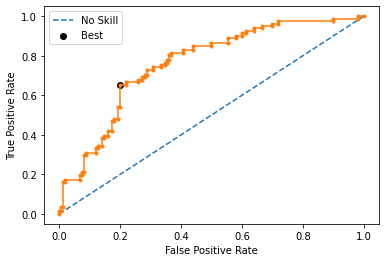

In [45]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [46]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

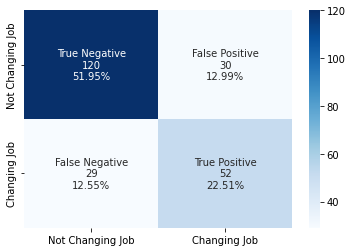

In [47]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [40]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.63      0.72      0.67        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.75      0.76       231



It can be observed that both false negatives and recall scores have improved slightly in model 3, despite the fact that there is overfitting.

In the next model, I will try to perform hyperparameter tuning.

### Model 4

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In this model, I will try to tune the parameters and also I will use Dropout method to avoid overfitting.

In [48]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [52]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = 8))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

I will use Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

In [53]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [51]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
7/7 [==============================] - 1s 23ms/step - loss: 3.1050 - accuracy: 0.5408 - val_loss: 0.6068 - val_accuracy: 0.6667
Best: 0.661080 using {'batch_size': 64, 'lr': 0.001}
Total runtime of the program is 21.69616961479187


As shown above, the best results of the grid search are batch_size=64 and learniing rate 0.001.
Next the model will be run based on the best results of grid search.

In [55]:
estimator=create_model_v4(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2304      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

In [56]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 1s 24ms/step - loss: 2.3786 - accuracy: 0.5478 - val_loss: 0.9426 - val_accuracy: 0.5926
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 1.3842 - accuracy: 0.5385 - val_loss: 0.9348 - val_accuracy: 0.5741
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2002 - accuracy: 0.6084 - val_loss: 0.9544 - val_accuracy: 0.5648
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0592 - accuracy: 0.5967 - val_loss: 0.7453 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.9499 - accuracy: 0.5688 - val_loss: 0.6685 - val_accuracy: 0.6296
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.9877 - accuracy: 0.5618 - val_loss: 0.6920 - val_accuracy: 0.6019
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.9734 - accuracy: 0.5711 - val_loss: 0.7058 - val_accuracy: 0.4630
Epoch 8/50
7/7 [=================

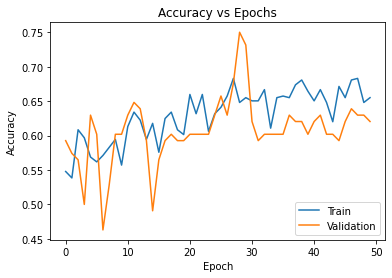

In [57]:
# Plotting accuracy at different epochs
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The above plot shows that the model is not overfitting. However, the accuracy of both training and validation sets have been reduced substantially.

Best Threshold=0.404635, G-Mean=0.650


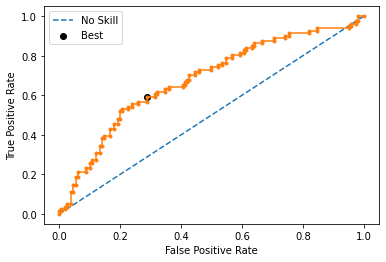

In [59]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [62]:
y_pred_e5=estimator.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

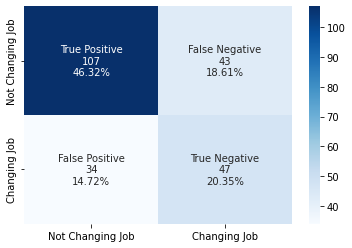

In [63]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [64]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       150
           1       0.52      0.58      0.55        81

    accuracy                           0.67       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.67      0.67       231



Also, false negatives and recall scores have been reduced as well, meaniing that the default parameters of previous models gave better results.

### Business Recommendations

In this exercise, 4 different NN models were built. It was observed that Model 3, which used batch normalization gave better results, both in terms of Recall and also false negatives. However, this model was slightly overfitting.


The next best model was model 2, which had a Recall score of 62% and false negatives were 13%. Although the scores are not great but the model was not overfitting.

It is suggested to try other models as well in order to find better scores. Also, it is recommended to use feature engineering in order to find more suitable features.